In [1]:
# This Notebook describe how to denoise using SVD technique. (Singular Value Decomposition).

In [2]:
import librosa as librosa
import numpy as np
from matplotlib import pyplot as plt

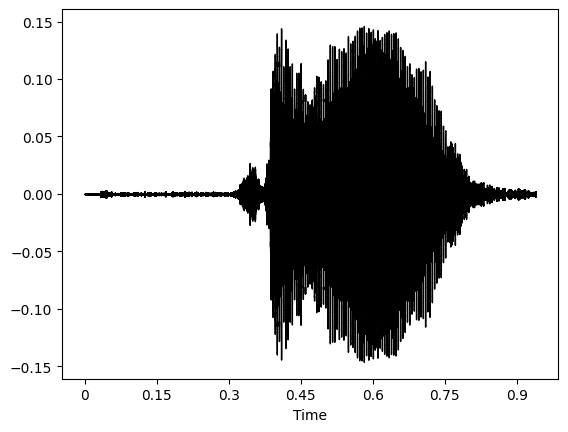

In [3]:
# Load audio file
audio_file = '../../../Downloads/american_f_Maria_20230405140612.wav'
y, sr = librosa.load(audio_file)

librosa.display.waveshow(y,sr=sr,color='black')

In [4]:
import IPython.display as ipd
ipd.Audio(audio_file)

In [5]:
# getting STFT matrix
#output :numpy.ndarray
matrix_STTF = librosa.stft(y)

In [6]:
type(matrix_STTF)

numpy.ndarray

Text(0.5, 1.0, 'Log-frequency power spectrogram')

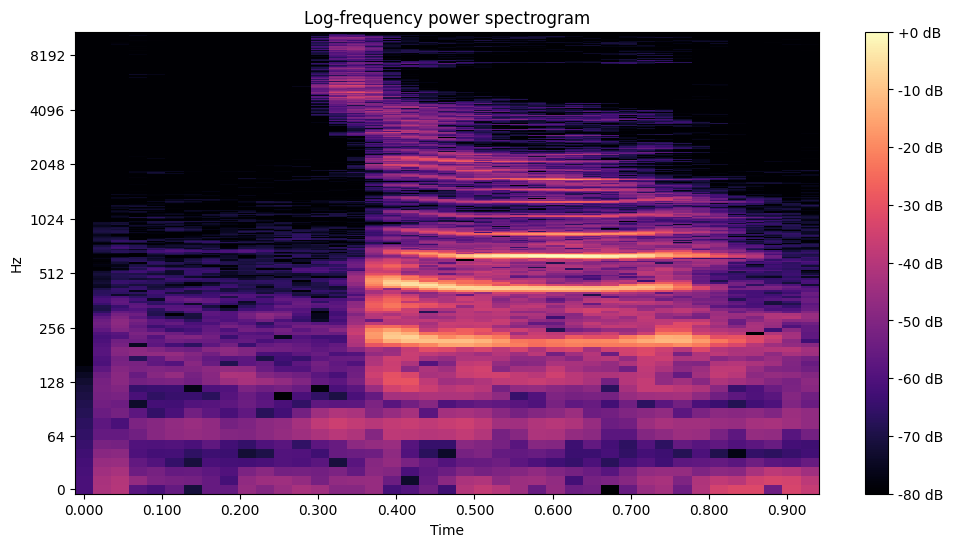

In [7]:
# Visualize spectrogram
S_db = librosa.amplitude_to_db(np.abs(matrix_STTF), ref=np.max)
plt.figure(figsize=(12, 6))
librosa.display.specshow(S_db, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

(1025, 1025) (41,) (41, 41)
5
[[174.76381    0.         0.       ...   0.         0.         0.      ]
 [  0.        83.02761    0.       ...   0.         0.         0.      ]
 [  0.         0.        37.432407 ...   0.         0.         0.      ]
 ...
 [  0.         0.         0.       ...   0.         0.         0.      ]
 [  0.         0.         0.       ...   0.         0.         0.      ]
 [  0.         0.         0.       ...   0.         0.         0.      ]]


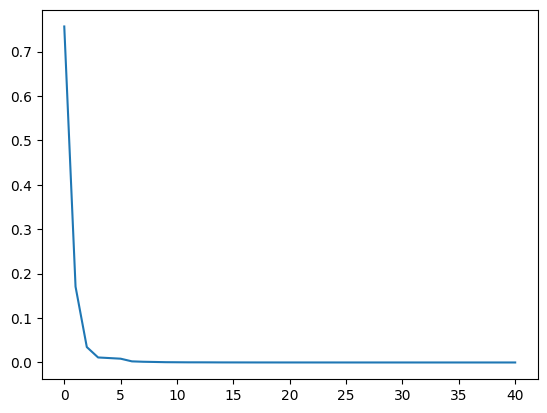

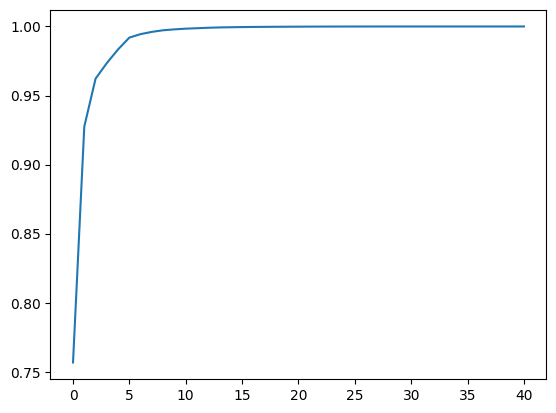

In [8]:
D_mag, D_phase = librosa.magphase(matrix_STTF)
n,m = D_mag.shape[:]

# Perform SVD on spectrogram
U, S_diag, V = np.linalg.svd(D_mag)
print(U.shape, S_diag.shape, V.shape)

plt.figure()
plt.plot(S_diag**2/sum(S_diag**2))
plt.figure()
plt.plot(np.cumsum(S_diag**2)/sum(S_diag**2))

normalized_cumulative_sum =np.cumsum(S_diag**2)/sum(S_diag**2)

# # Set threshold for truncation
threshold_index =  np.argmax(normalized_cumulative_sum >= 0.99)
print(threshold_index)
# Truncate singular values
S_diag_trunc = np.diag(np.where(S_diag> S_diag[threshold_index], S_diag, 0))
print(S_diag_trunc)
S_diag = np.zeros((n,m))
S_diag[:m,:] = S_diag_trunc

# # Reconstruct denoised spectrogram
D_mag_denoised = U.dot(S_diag).dot(V)
S_denoised = D_mag_denoised * D_phase

# # Inverse STFT to obtain denoised audio signal
y_denoised = librosa.istft(S_denoised)

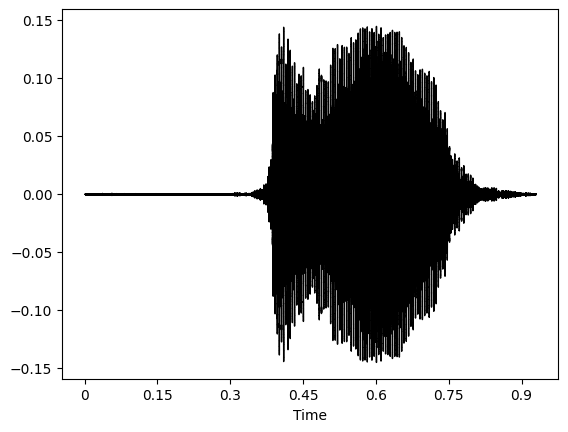

In [9]:
librosa.display.waveshow(y_denoised,color='black')

#Denoise wave graph now has straight line(no wave) from 0 to 0.3

Text(0.5, 1.0, 'Log-frequency power spectrogram')

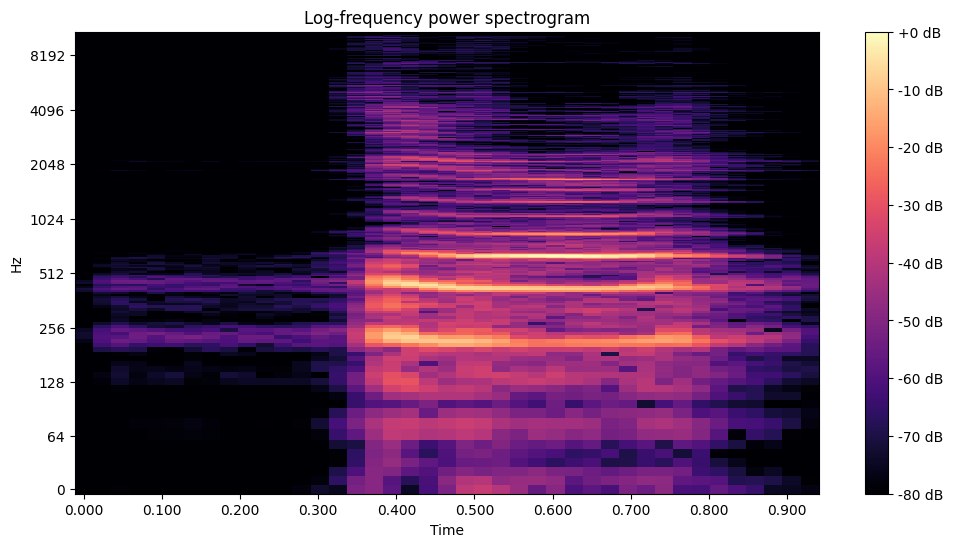

In [10]:
matrix_STTF = librosa.stft(y_denoised)
S_db = librosa.amplitude_to_db(np.abs(matrix_STTF), ref=np.max)
plt.figure(figsize=(12, 6))
librosa.display.specshow(S_db, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

In [11]:
import soundfile as sf
sf.write('denoised_audio.wav', y_denoised, sr)
ipd.Audio('denoised_audio.wav')
